In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_tahsilat = pd.read_csv("tahsilat.csv", sep=";", encoding="utf-8", low_memory=False)
df_tahsilat_1 = pd.read_csv("tahsilat_1.csv", sep=";", encoding="utf-8", low_memory=False)

df_tahakkuk = pd.read_csv("tahakkuk_hamamozu.csv", sep=";", encoding="utf-8", low_memory=False)
df_tahakkuk_1 = pd.read_csv("tahakkuk_gumushacikoy.csv", sep=";", encoding="utf-8", low_memory=False)
df_tahakkuk_2 = pd.read_csv("tahakkuk_goynucek.csv", sep=";", encoding="utf-8", low_memory=False)

In [14]:
df_tahakkuk["ilce"] = "Hamamözü"
df_tahakkuk_1["ilce"] = "Gümüşhacıköy"
df_tahakkuk_2["ilce"] = "Göynücek"

In [15]:
df_tahakkuk_all = pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)

In [16]:
df_tahakkuk_all["kwh"] = pd.to_numeric(df_tahakkuk_all["kwh"], errors="coerce")
df_kwh_valid = df_tahakkuk_all[(df_tahakkuk_all["kwh"].notna()) & (df_tahakkuk_all["kwh"] >= 0)]
df_kwh_positive = df_kwh_valid[df_kwh_valid["kwh"] > 0].copy()

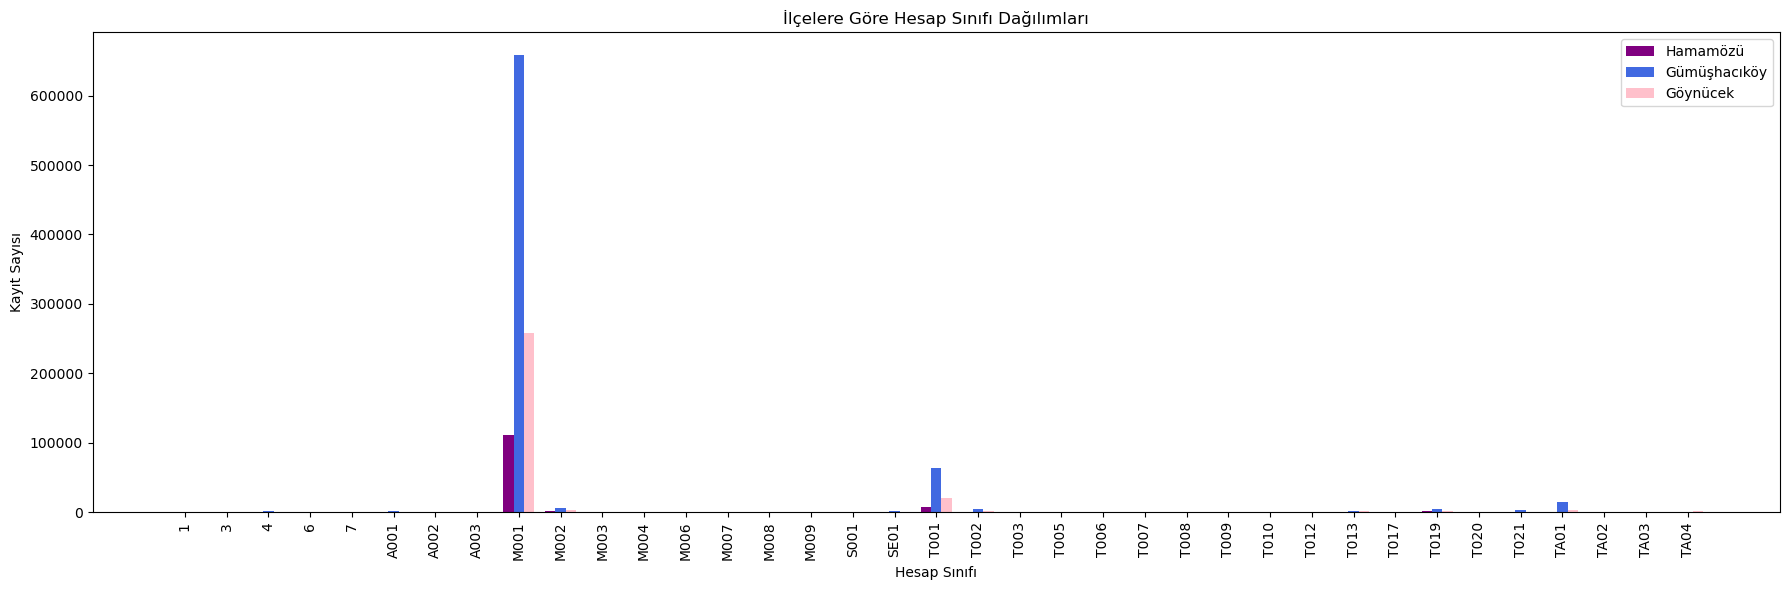

In [17]:
hs_hamam = df_tahakkuk["hesap_sinifi"].value_counts()
hs_gumus = df_tahakkuk_1["hesap_sinifi"].value_counts()
hs_goy = df_tahakkuk_2["hesap_sinifi"].value_counts()

hesap_siniflari = sorted(set(hs_hamam.index) | set(hs_gumus.index) | set(hs_goy.index))

hamam = [hs_hamam.get(h, 0) for h in hesap_siniflari]
gumus = [hs_gumus.get(h, 0) for h in hesap_siniflari]
goy = [hs_goy.get(h, 0) for h in hesap_siniflari]

x = np.arange(len(hesap_siniflari)); width = 0.25

plt.figure(figsize=(18,6))
plt.bar(x - width, hamam, width, label="Hamamözü", color="purple")
plt.bar(x, gumus, width, label="Gümüşhacıköy", color="royalblue")
plt.bar(x + width, goy, width, label="Göynücek", color="pink")

plt.xticks(x, hesap_siniflari, rotation=90)
plt.title("İlçelere Göre Hesap Sınıfı Dağılımları")
plt.xlabel("Hesap Sınıfı")
plt.ylabel("Kayıt Sayısı")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
df_kwh_positive.columns

Index(['il', 'ilce', 'sozlesme_hesap_no', 'mali_yil_donem', 'fatura_tarihi',
       'kayit_tarihi', 'vade_tarihi', 'hesap_sinifi', 'Hesap Sınıfı', 'kwh'],
      dtype='object')

In [19]:
df_kwh_positive["fatura_tarihi"] = pd.to_datetime(df_kwh_positive["fatura_tarihi"])
df_kwh_positive["ay"] = df_kwh_positive["fatura_tarihi"].dt.to_period("M")

In [20]:
aylik_ortalama = df_kwh_positive.groupby(["ilce","ay"])["kwh"].mean().reset_index()

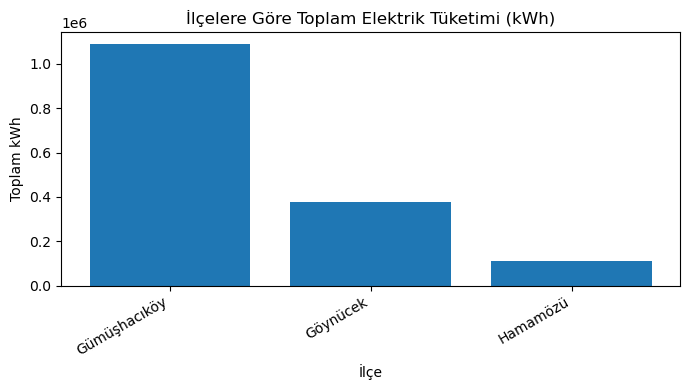

In [31]:
ilce_kwh = df_kwh_positive.groupby("ilce")["kwh"].sum().reset_index()
ilce_kwh = ilce_kwh.sort_values("kwh", ascending=False)

plt.figure(figsize=(7,4))
plt.bar(ilce_kwh["ilce"], ilce_kwh["kwh"])
plt.title("İlçelere Göre Toplam Elektrik Tüketimi (kWh)")
plt.xlabel("İlçe")
plt.ylabel("Toplam kWh")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()

plt.savefig("outputs/figures/ilce_karsilastirma.png", dpi=300, bbox_inches="tight")
plt.show()

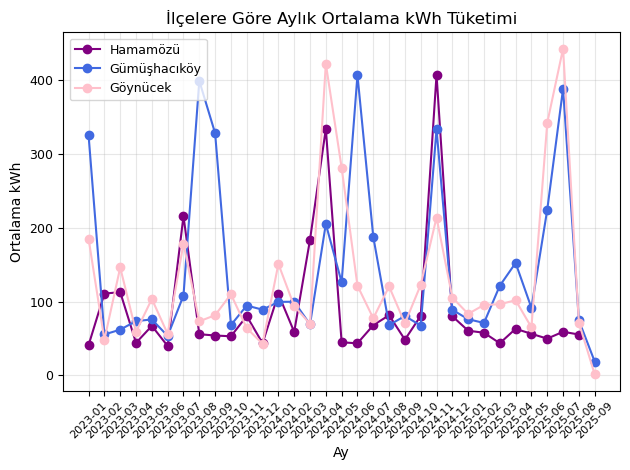

In [32]:
for ilce, renk in zip(
    ["Hamamözü", "Gümüşhacıköy", "Göynücek"],
    ["purple", "royalblue", "pink"]
):
    temp = aylik_ortalama[aylik_ortalama["ilce"] == ilce]
    plt.plot(
        temp["ay"].astype(str),
        temp["kwh"],
        label=ilce,
        color=renk,
        marker="o"
    )

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=9)
plt.title("İlçelere Göre Aylık Ortalama kWh Tüketimi", fontsize=12)
plt.xlabel("Ay", fontsize=10)
plt.ylabel("Ortalama kWh", fontsize=10)
plt.legend(fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/figures/mevsimsel_tuketim.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
df_tahsilat.columns

Index(['Şube', 'Kasa', 'İlçe', 'Söz.hsp.(bağımsız)', 'Tahsilat Tarihi',
       'Nakit Tahsilat', 'Mahsuben Tahsilat', 'Kredi Kartı Tahsilatı',
       'Banka Tahsilatı'],
      dtype='object')

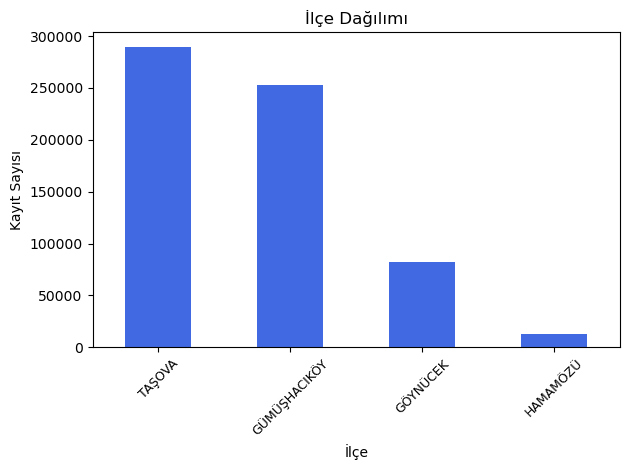

In [23]:
df_tahsilat["İlçe"].value_counts().plot(
    kind="bar",
    title="İlçe Dağılımı",
    color="royalblue"
)
plt.ylabel("Kayıt Sayısı")
plt.xlabel("İlçe")
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

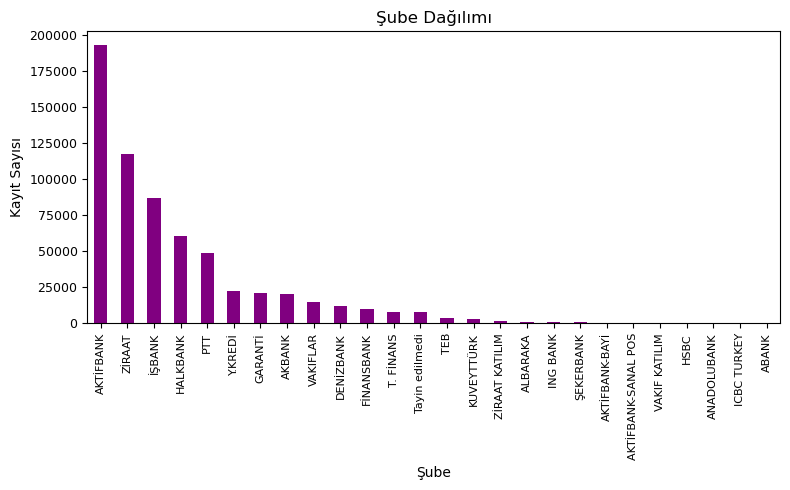

In [24]:
plt.figure(figsize=(8,5))

df_tahsilat["Şube"].value_counts().plot(
    kind="bar",
    title="Şube Dağılımı",
    color="purple"
)

plt.ylabel("Kayıt Sayısı", fontsize=10)
plt.xlabel("Şube", fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

In [25]:
df_tahsilat_1.columns

Index(['Mali yıl/dönem', 'İl', 'İlçe', 'Söz.hsp.(bağımsız)', 'Hesap Sınıfı',
       'Tahakkuk Tutar', 'Son Ödeme Tarihinden Önceki Tahsilat',
       'Son Ödeme Tarihindeki Tahsilat', 'Son Ödeme (1)', 'Son Ödeme (2)',
       'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)', 'Son Ödeme (6-10)',
       'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
       'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
       'Son Ödeme (150-180)', 'Son Ödeme (180+)'],
      dtype='object')

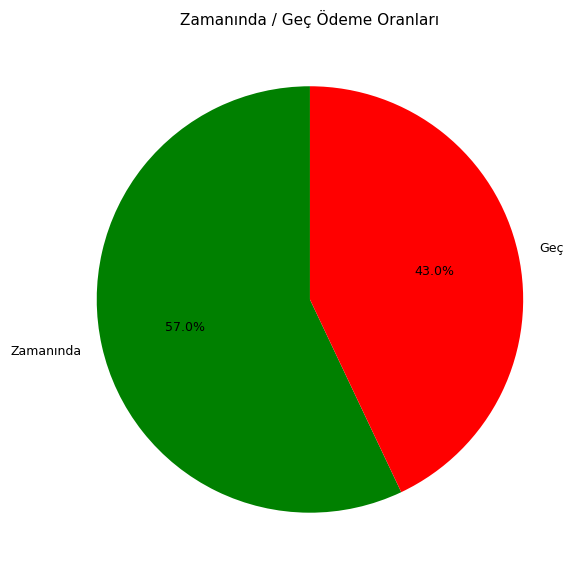

In [26]:
zamaninda = [
    "Son Ödeme Tarihinden Önceki Tahsilat",
    "Son Ödeme Tarihindeki Tahsilat"
]

gec = [
    "Son Ödeme (1)", "Son Ödeme (2)", "Son Ödeme (3)", "Son Ödeme (4)", "Son Ödeme (5)",
    "Son Ödeme (6-10)", "Son Ödeme (10-20)", "Son Ödeme (20-30)",
    "Son Ödeme (30-60)", "Son Ödeme (60-90)", "Son Ödeme (90-120)",
    "Son Ödeme (120-150)", "Son Ödeme (150-180)", "Son Ödeme (180+)"
]

df_tahsilat_1[zamaninda + gec] = df_tahsilat_1[zamaninda + gec].apply(
    lambda s: pd.to_numeric(s, errors="coerce")
)

zamaninda_toplam = df_tahsilat_1[zamaninda].sum().sum()
gec_toplam = df_tahsilat_1[gec].sum().sum()

oranlar = pd.Series({"Zamanında": zamaninda_toplam, "Geç": gec_toplam})

plt.figure(figsize=(6,6))
plt.pie(
    oranlar,
    labels=oranlar.index,
    colors=["green", "red"],
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 9}
)
plt.title("Zamanında / Geç Ödeme Oranları", fontsize=11)
plt.tight_layout()
plt.show()


In [27]:
kwh = df_kwh_positive["kwh"].dropna()

Q1 = kwh.quantile(0.25)
Q3 = kwh.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

outliers = df_kwh_positive[
    (df_kwh_positive["kwh"] < alt_sinir) |
    (df_kwh_positive["kwh"] > ust_sinir)
]

print("Outlier sayısı:", outliers.shape[0])
print("Alt sınır:", alt_sinir)
print("Üst sınır:", ust_sinir)

Outlier sayısı: 562
Alt sınır: -63.5
Üst sınır: 172.5


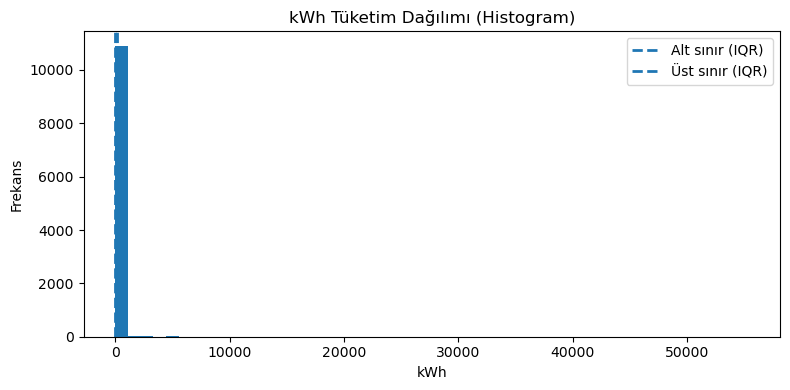

In [28]:
plt.figure(figsize=(8,4))
plt.hist(kwh, bins=50)
plt.axvline(alt_sinir, linestyle="--", linewidth=2, label="Alt sınır (IQR)")
plt.axvline(ust_sinir, linestyle="--", linewidth=2, label="Üst sınır (IQR)")
plt.title("kWh Tüketim Dağılımı (Histogram)")
plt.xlabel("kWh"); plt.ylabel("Frekans")
plt.legend(); plt.tight_layout(); plt.show()


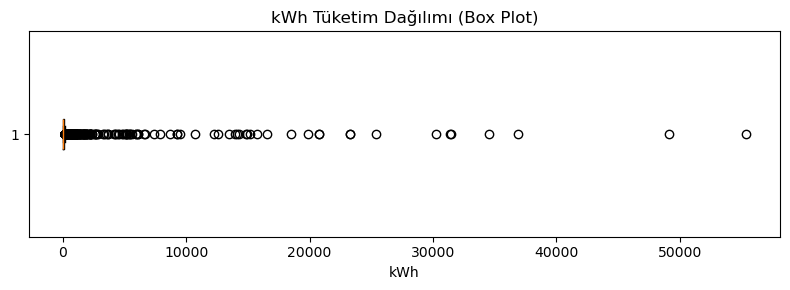

In [29]:
plt.figure(figsize=(8,3))
plt.boxplot(kwh, vert=False, showfliers=True)
plt.title("kWh Tüketim Dağılımı (Box Plot)")
plt.xlabel("kWh"); plt.tight_layout(); plt.show()
